In [2]:
# !python -m pip install lyricwikia
# !python -m pip install spotipy
# !python -m pip install plotly

# Sufjan Stevens Lyric Generator

In [3]:
import plotly.plotly as py
import plotly.graph_objs as go
import lyricwikia
import matplotlib.pyplot as plt
import numpy as np
import string
import pandas as pd
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import tensorflow as tf

In [10]:
client_credentials_manager = SpotifyClientCredentials(client_id='CLIENT_ID', client_secret='CLIENT_SECRET')
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)
py.sign_in('username', 'API_KEY')

# get top 50 songs by Sufjan Stevens
# artists = ['Sufjan Stevens', 'Rex Orange County', 'Maggie Rogers']
artists = ['Sufjan Stevens']

top_50 = {}
for artist in artists:
    top_50[artist] = []
    results = sp.search(q=artist, limit=50)
    for i, t in enumerate(results['tracks']['items']):
        print(str(i) + '. ' + t['name'])
        top_50[artist].append(t['name'])

0. Mystery of Love (From the Original Motion Picture “Call Me by Your Name”)
1. Mystery of Love
2. Visions of Gideon
3. The Only Thing
4. Death with Dignity
5. Should Have Known Better
6. Casimir Pulaski Day
7. To Be Alone With You
8. Chicago
9. Futile Devices (Doveman Remix)
10. Fourth of July
11. Futile Devices
12. Make Out in My Car - Sufjan Version
13. All of Me Wants All of You
14. Eugene
15. John My Beloved
16. The Predatory Wasp of The Palisades Is Out To Get Us
17. No Shade in the Shadow of The Cross
18. Drawn to the Blood
19. All the Trees of the Field Will Clap Their Hands
20. John Wayne Gacy, Jr.
21. Concerning the UFO sighting near Highland, Illinois
22. Come On! Feel the Illinoise! Part I: The World's Columbian Exposition Part II: Carl Sandburg Visits Me In A Dream
23. Carrie & Lowell
24. Jacksonville
25. Blue Bucket of Gold
26. The Dress Looks Nice on You
27. Tonya Harding (In D major)
28. For the Widows in Paradise, For the Fatherless in Ypsilanti
29. Wallowa Lake Monste

In [13]:
def make_upper(words):
    return map(lambda word : word.upper(), words)

def word_cnt(words):
    wordfreq = []
#     words = words.translate(string.punctuation)
    map(lambda word : word.upper(), words)
    wordlist = words.split()
    wordfreq = [wordlist.count(w) for w in wordlist]
    return dict(zip(wordlist,wordfreq))

def get_freqs(lyrics):
    freqs = word_cnt(lyrics)
    return freqs
  

def get_lyrics(top_50):
    unique_words = []
    titles = []
    dictionaries = []
    title_lyrics = {}
    all_lyrics = []
    plot_data = []

    for artist in top_50.keys():
        print(artist)
        songs = top_50[artist]
        for title in songs:
            print(title)
            title = title.lstrip(' ')
            try:
                lyrics = lyricwikia.get_lyrics(artist, title)
                all_lyrics.append((lyrics))
                freq_vals = get_freqs(lyrics)
                if len(freq_vals)>0:
                    print('unique word count: ' + str(len(freq_vals)))
                    title_lyrics[title] = lyrics
                    xaxis = np.linspace(1, len(freq_vals), len(freq_vals))
                    trace = go.Scatter(
                      x = xaxis,
                      y = [v for v in freq_vals.values()], 
                      name=title
                    )
                    plot_data.append(trace)
                    plt.plot(xaxis, [v for v in freq_vals.values()])
                    plt.title(title)
                    plt.xlabel('unique word')
                    plt.ylabel('frequency')
                    plt.show()
                    dictionaries.append(freq_vals)
                    unique_words.append(len(freq_vals))    
                    titles.append(title)
                    df_data = pd.DataFrame({'Artist':artist,
                                            'Song': titles,
                                            'Unique Word Count': unique_words,
                                            'Dictionary of word count': dictionaries
                    })
            except:
                continue
    return all_lyrics, df_data

In [35]:
plot_data = []

for artist in top_50.keys():
    print(artist)
    songs = top_50[artist]
    for title in songs:
        title = title.lstrip(' ')
        try:
            lyrics = lyricwikia.get_lyrics(artist, title)
            all_lyrics.append((lyrics))
            freq_vals = get_freqs(lyrics)
#             print(freq_vals)
            if len(freq_vals)>0:
#                 print('entered')
                trace = go.Scatter(
                x = [k for k in freq_vals.keys()],
                y = [v for v in freq_vals.values()], 
                #                 name=title
                )
                plot_data.append(trace)
#                 print('appended trace')
        except:
            continue
# Edit the layout
layout = dict(title = 'Word Frequency',
              xaxis = dict(title = 'Unique Word'),
              yaxis = dict(title = 'Frequency'),
#               legend=dict(x=-.1, y=1.2, orientation='h')
              )

fig = dict(data=plot_data, layout=layout)
py.iplot(fig)


Sufjan Stevens


Sufjan Stevens
Mystery of Love (From the Original Motion Picture “Call Me by Your Name”)
Mystery of Love
Visions of Gideon
The Only Thing
unique word count: 126


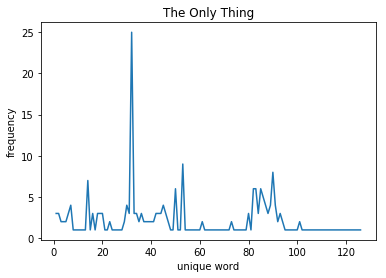

Death with Dignity
unique word count: 106


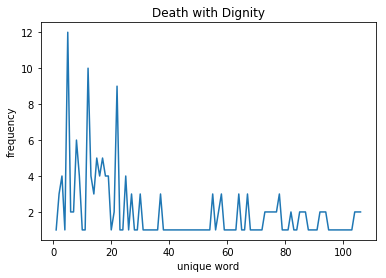

Should Have Known Better
unique word count: 128


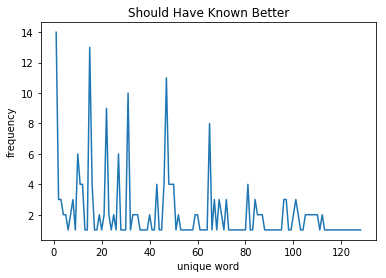

Casimir Pulaski Day
unique word count: 153


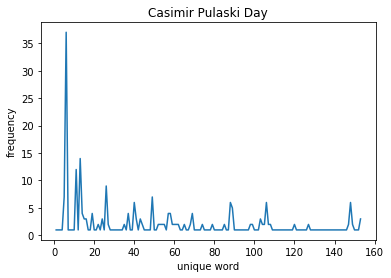

To Be Alone With You
unique word count: 47


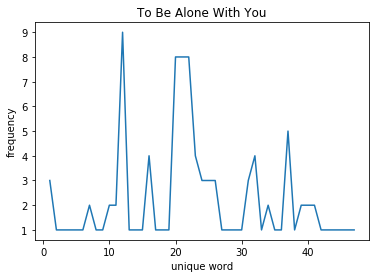

Chicago
unique word count: 66


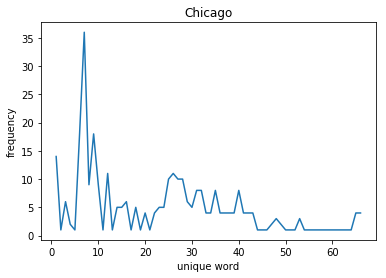

Futile Devices (Doveman Remix)
unique word count: 82


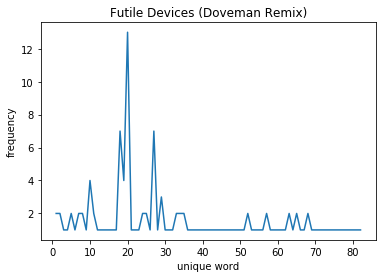

Fourth of July
unique word count: 130


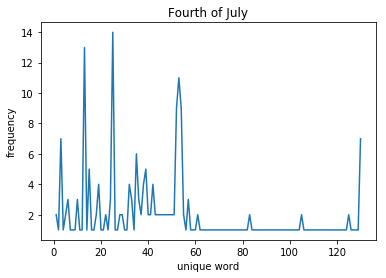

Futile Devices
unique word count: 82


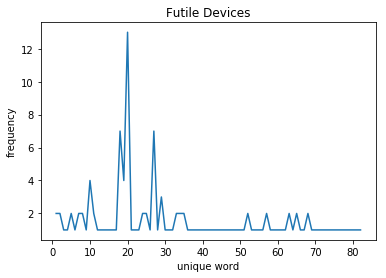

Make Out in My Car - Sufjan Version
All of Me Wants All of You
unique word count: 74


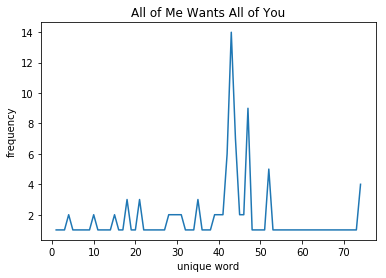

Eugene
unique word count: 135


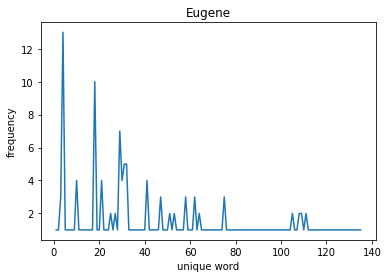

John My Beloved
unique word count: 161


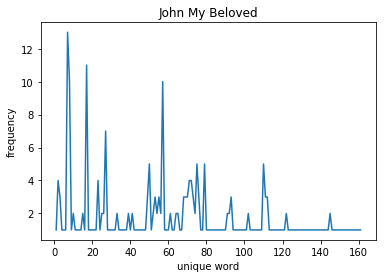

The Predatory Wasp of The Palisades Is Out To Get Us
No Shade in the Shadow of The Cross
unique word count: 79


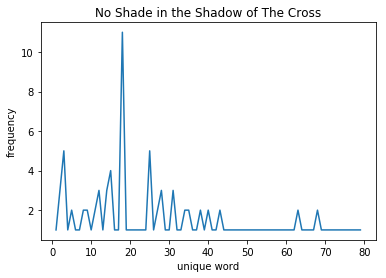

Drawn to the Blood
unique word count: 57


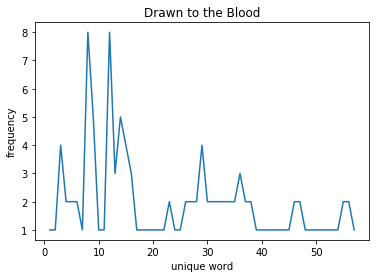

All the Trees of the Field Will Clap Their Hands
unique word count: 58


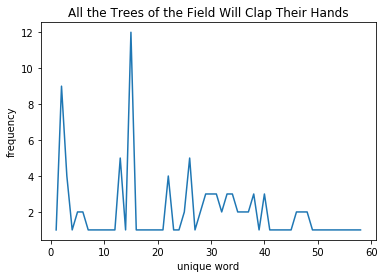

John Wayne Gacy, Jr.
unique word count: 116


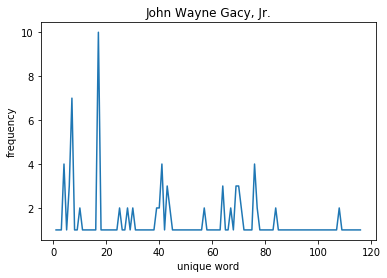

Concerning the UFO sighting near Highland, Illinois
unique word count: 48


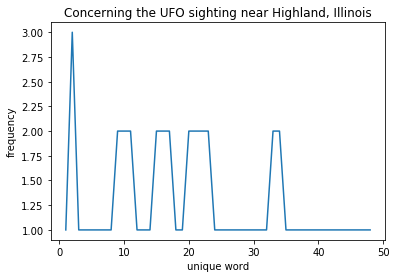

Come On! Feel the Illinoise! Part I: The World's Columbian Exposition Part II: Carl Sandburg Visits Me In A Dream
Carrie & Lowell
unique word count: 101


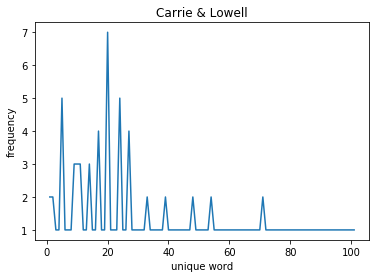

Jacksonville
unique word count: 120


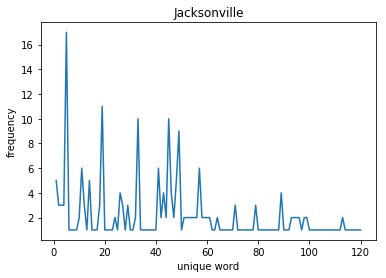

Blue Bucket of Gold
unique word count: 50


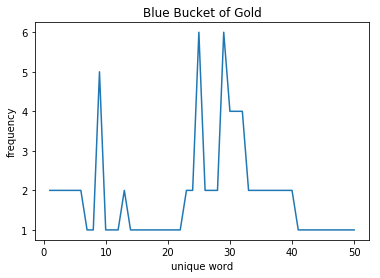

The Dress Looks Nice on You
unique word count: 33


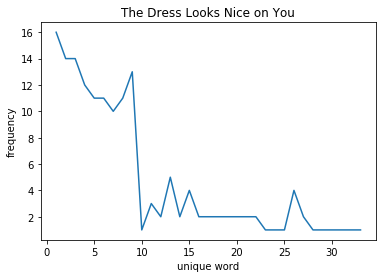

Tonya Harding (In D major)
For the Widows in Paradise, For the Fatherless in Ypsilanti
unique word count: 80


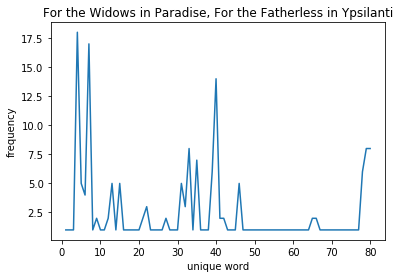

Wallowa Lake Monster
Redford (for Yia-Yia and Pappou)
Drawn to the Blood - Sufjan Stevens Remix
Wallowa Lake Monster
City of Roses
The Hidden River of My Life
Decatur, or, Round of Applause for Your Step-Mother!
Romulus
unique word count: 86


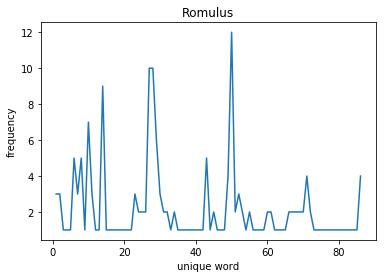

The Greatest Gift
Tonya Harding (In Eb major)
Vesuvius
unique word count: 107


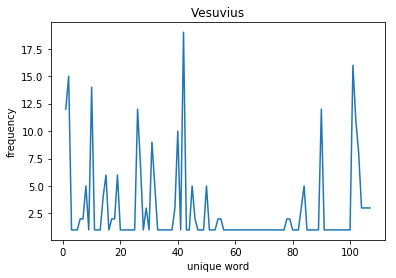

They Are Night Zombies!! They Are Neighbors!! They Have Come Back From the Dead!! Ahhhh!
unique word count: 144


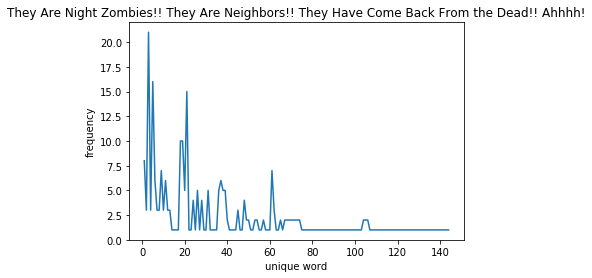

Flint (For the Unemployed and Underpaid)
unique word count: 35


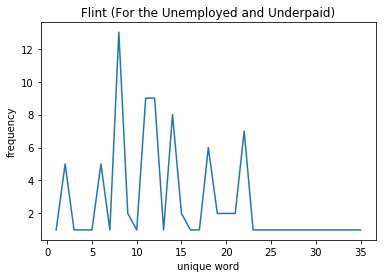

Come Thou Fount of Every Blessing
unique word count: 100


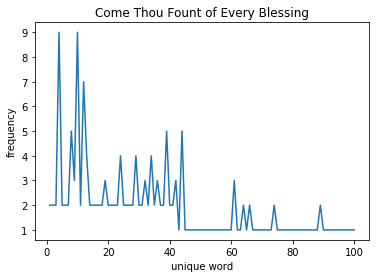

The Man of Metropolis Steals Our Hearts
unique word count: 115


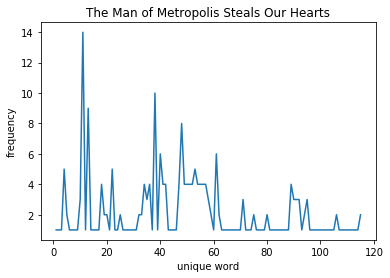

The Black Hawk War, Or, How to Demolish an Entire Civilization and Still Feel Good About Yourself In the Morning, Or, We Apologize for the Inconvenience But You're Going to Have to Leave Now, Or...
Impossible Soul
unique word count: 289


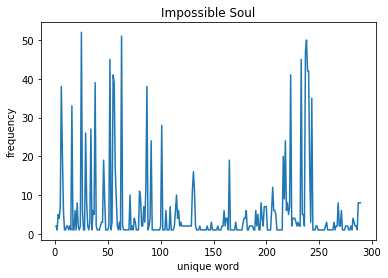

The Seer's Tower
unique word count: 63


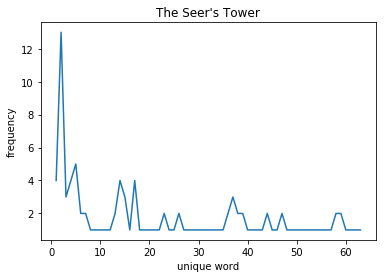

Exploding Whale - Doveman Remix
Seven Swans
unique word count: 69


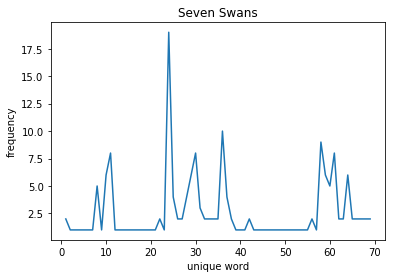

To The Workers of The Rock River Valley Region, I have an idea concerning your predicament, and it involves an inner tube, bath mats, and 21 able-bodied men


In [15]:
all_lyrics, df_data = get_lyrics(top_50)

In [36]:
df_data.describe()

,Unique Word Count
count,31.000000
mean,98.064516
std,49.936583
min,33.000000
25%,64.500000
50%,86.000000
75%,123.000000
max,289.000000


In [37]:
df_data.head()

,Artist,Song,Unique Word Count,Dictionary of word count
0,Sufjan Stevens,The Only Thing,126,"{'The': 3, 'only': 3, 'thing': 2, 'that': 2, '..."
1,Sufjan Stevens,Death with Dignity,106,"{'Spirit': 1, 'of': 3, 'my': 4, 'silence': 1, ..."
2,Sufjan Stevens,Should Have Known Better,128,"{'I': 14, 'should': 3, 'have': 3, 'known': 2, ..."
3,Sufjan Stevens,Casimir Pulaski Day,153,"{'Two,': 1, 'three,': 1, 'four': 1, 'Goldenrod..."
4,Sufjan Stevens,To Be Alone With You,47,"{'I'd': 3, 'swim': 1, 'across': 1, 'Lake': 1, ..."


In [38]:
# put all lyrics into one long string to get count of total characters
data = ""
for lyric in all_lyrics:
    data = data + " " +  lyric.lower()
    
# get list of unique characters
chars = sorted(list(set(str(data))))
# chars = [char for char in chars]

# create dictionary of key: numeric, val: unique character
char_to_int = dict((c, i) for i, c in enumerate(chars))

# create dictionary of key: unique character, val: numeric
int_to_char = dict((i, c) for i, c in enumerate(chars))

# get count of total characters
N_ALL_CHARS = len(data)

# get count of unique characters
N_UNIQUE_CHARS = len(chars)

print("Total Characters: " + str(N_ALL_CHARS))
print("Total Distinct Characters: " + str(N_UNIQUE_CHARS))
print("Unique Characters: ", chars)

Total Characters: 746059
Total Distinct Characters: 42
Unique Characters:  ['\n', ' ', '!', '"', "'", '(', ')', ',', '-', '.', '2', '3', '4', ':', '?', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '’']


In [40]:
# prepare the dataset of input-output pairs encoded as integers

# set char length of lyric line
SEQ_LENGTH = 50 
N_SEQ = int(len(data)/SEQ_LENGTH)

# create list of keys for each character window
# inputs data needs to be 3D  (number of sequences, length of sequences, number of features aka unique chars)
inputs = np.zeros((N_SEQ, SEQ_LENGTH, N_UNIQUE_CHARS)) # key of each character in window

# create list of output result from input key window
outputs = np.zeros((N_SEQ, SEQ_LENGTH, N_UNIQUE_CHARS))

# # iterate through all characters, shifting window by 1 character
# for i in range(0, N_ALL_CHARS - SEQ_LENGTH, 1):
#     # window of input chars
#     input_seq = data[i:i + SEQ_LENGTH] 
# #     print('SEQ_IN:', input_seq)
    
#     # chars following window
#     target_seq = data[i+1:i+1 + SEQ_LENGTH] # char following window
    
# #     print('SEQ_OUT:', target_seq, '\n')
#     inputs.append([char_to_int[c] for c in input_seq])
#     outputs.append([char_to_int[c] for c in target_seq])

# # get total number of patterns
# N_PATTERNS = len(inputs)
# print("Total Patterns: " + str(N_PATTERNS))



# iterate through all characters, shifting window by 1 character
for i in range(0, N_SEQ)[:1]:
    input_seq = data[i:i+SEQ_LENGTH]
    # get numeric encodings of character values for window
    print([val for val in input_seq])
    input_seq_idx = [char_to_int[value] for value in input_seq]
    # create input sequence placeholder to one-hot encode unique_character 
    input_seq_ph = np.zeros((SEQ_LENGTH, N_UNIQUE_CHARS))
    # iterate through placeholder to one-hot encode, placing 1 value 
    # at mapped position to indicate the unique character
    for j in range(SEQ_LENGTH):
        input_seq_ph[j][input_seq_idx[j]] = 1.
    inputs[i] = input_seq_ph

    output_seq = data[i+1:(i+1)+SEQ_LENGTH]
#     print(output_seq)
    output_seq_idx = [char_to_int[value] for value in output_seq]
    output_seq_ph = np.zeros((SEQ_LENGTH, N_UNIQUE_CHARS))
    for j in range(SEQ_LENGTH):
        output_seq_ph[j][output_seq_idx[j]] = 1.           
    outputs[i] = output_seq_ph

# get total number of patterns
N_PATTERNS = len(inputs)
print("Total Patterns: " + str(N_PATTERNS))


[' ', 't', 'h', 'e', ' ', 'o', 'n', 'l', 'y', ' ', 't', 'h', 'i', 'n', 'g', ' ', 't', 'h', 'a', 't', ' ', 'k', 'e', 'e', 'p', 's', ' ', 'm', 'e', ' ', 'f', 'r', 'o', 'm', ' ', 'd', 'r', 'i', 'v', 'i', 'n', 'g', ' ', 't', 'h', 'i', 's', ' ', 'c', 'a']
Total Patterns: 14921


In [41]:
print(np.array(inputs).shape)
print(np.array(outputs).shape)

(14921, 50, 42)
(14921, 50, 42)


In [42]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.layers import TimeDistributed
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils

Using TensorFlow backend.


For our model, we start with an LSTM layer with 256 memory units. We also initiate the input shape as None, N_UNIQUE_CHARS (in our case, 42) which indicates variable-length sequences of 42-dimensional vectors for the input. Setting return_sequences=True enables us to reutrn the hidden state output for each input time step. The output will be a sequence of the same length, as opposed to just one vector that is returned at the last time step. 

In [43]:
model = Sequential()
# 256 memory units in cell
# Our input shape indicates variable-length sequences of 42-dimensional vectors
# return_sequences = True, return hidden state output for each input time step
# the output will be a sequence of the same length, as opposed to just one vector
model.add(LSTM(256, input_shape=(None, N_UNIQUE_CHARS), return_sequences=True))
model.add(LSTM(256, return_sequences=True))

# Dropout 20% of inputs (to reduce overfitting)
model.add(Dropout(0.2))
# TimeDistributed allows you to apply Dense operation across every output at each time step 
model.add(TimeDistributed(Dense(N_UNIQUE_CHARS, activation='softmax')))
model.compile(loss='categorical_crossentropy', optimizer='adam')

In [44]:
def generate_lyrics(model, lyric_length):
    idx = [np.random.randint(N_UNIQUE_CHARS)]
    output_lyrics = [int_to_char[idx[-1]]]
    print(idx[-1])
    print('in: ', output_lyrics, '\n')
    # shape is (number of sequences, length of sequences, number of features aka unique chars)
    start = np.zeros((1, lyric_length, N_UNIQUE_CHARS))
    for i in range(lyric_length):
        #       print('entered loop')
        start[0, i, :][idx[-1]] = 1
        print(int_to_char[idx[-1]], end="")
        # np.argmax returns position of largest probability value
        prediction = model.predict(start[:, :i+1, :])
        #       print(prediction)
        #       print(prediction[0])
        idx = np.argmax(prediction[0], axis=1)
        result = int_to_char[idx[-1]]
        output_lyrics.append(result)
    return ('').join(output_lyrics)

In [51]:
model.fit(inputs, outputs, batch_size=32, verbose=1, epochs=100)

In [50]:
generate_lyrics(model, 200)